In [1]:
### Import the necessary modules/classes.

modulePath = '/home/joniko/tools/python'

import sys
sys.path.append(modulePath)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import readData
import statistics
import matplotlib.colors as mcolors



In [2]:
### User input
dataDirectory = ['/scratch/joniko/toy_cases/560m_5kmland_offshore/postProcessing']
                 
probes = ['probe.41.0',
          'probe.41.1',
          'probe.41.2',
          'probe.41.3',
          'probe.41.4',
          'probe.41.5',
          'probe.41.6',
          'probe.41.7',
          'probe.41.8',
          'probe.41.9',
          'probe.41.10']

timeStatisticsStart = 25000.0
timeStatisticsEnd = 30000.0

caseName =['offshore']

In [3]:
### User input
dataDirectory = ['/scratch/joniko/toy_cases/560m_5kmland_strongerwestdump_offshore/postProcessing',
                 '/scratch/joniko/toy_cases/560m_5kmland_offshore/postProcessing']
                 
probes = ['probe.41.0',
          'probe.41.1']

timeStatisticsStart = 25000.0
timeStatisticsEnd = 30000.0

caseName =['offshore']

In [4]:
u = []
v = []
w = []
couw_all = []
couu_all = []
covv_all = []
coww_all = []
couv_all = []
covw_all = []
dd_all = []
uvw_all = []
uvwfl_all = []
z_all = []
nProbes = len(probes)
nLevels = 3


# Loop through each case.
for m in range(len(dataDirectory)):
    dd_ = []
    uvw_ = []
    uvw = []
    uvwfl_ = []
    z_ = []
    cov = []
    print(len(dataDirectory))
    print('Reading data from case ' + dataDirectory[m] + '...')
    print(len(probes))
    for i in range(len(probes)):
        print ('Reading probe  ',  i )
        probeFile = dataDirectory[m] + '/' + probes[i]
        
        t_,data_,probePosition,nComponents,nProbes = readData.probeOpenFOAM(probeFile,'U')
    
        indStart = np.abs(t_ - timeStatisticsStart).argmin()
        indEnd = np.abs(t_ - timeStatisticsEnd).argmin()
        
        print('Average over time ...')
        
        uvw = np.mean(data_[indStart:indEnd,:],axis=0)
        
        print('Find fluctuations ...')
        
        uvwfl = (data_[indStart:indEnd,:])-np.mean(data_[indStart:indEnd,:],axis=0)
    
        print('Find all covariance components ...')
        cov = np.cov(uvwfl)
        
        couwl_ = np.mean((uvwfl[:,:,0]) * (uvwfl[:,:,2]),axis=0)
        couul_ = np.mean((uvwfl[:,:,0]) * (uvwfl[:,:,0]),axis=0)
        covvl_ = np.mean((uvwfl[:,:,1]) * (uvwfl[:,:,1]),axis=0)
        cowwl_ = np.mean((uvwfl[:,:,2]) * (uvwfl[:,:,2]),axis=0)
        couvl_ = np.mean((uvwfl[:,:,0]) * (uvwfl[:,:,1]),axis=0)
        covwl_ = np.mean((uvwfl[:,:,1]) * (uvwfl[:,:,2]),axis=0)
    
    
        dd_.append(data_[:,:])
        uvw_.append(uvw)
        u.append(uvw[:,0])
        v.append(uvw[:,1])
        w.append(uvw[:,2])
        z_.append(probePosition[:,2])

        uvwfl_.append(uvwfl)
 #       ufl.append(uvwfl_[:,0])
 #       vfl.append(uvwfl_[:,1])
 #       wfl.append(uvwfl_[:,2])
        
#        cov_.append(cov)
        couw.append(couwl_)
        couu.append(couul_)
        covv.append(covvl_)
        coww.append(cowwl_)
        couv.append(couvl_)
        covw.append(covwl_)
        
#        np.save('NewData',dd_,probePosition,z_,uvw_,uvwf_)
#        print(uvw_)
        
    dd_all.append(dd_)
    uvwall.append(uvw_)
    uvwfl_all.append(uvwfl_)
    z_all.append(z_)
    couw_all.append(couw)
    couu_all.append(couu)
    covv_all.append(covv)
    coww_all.append(coww)
    couv_all.append(couv)
    covw_all.append(covw)    


2
Reading data from case /scratch/joniko/toy_cases/560m_5kmland_strongerwestdump_offshore/postProcessing...
2
Reading probe   0
Average over time ...
Find fluctuations ...
Find all covariance components ...


ValueError: m has more than 2 dimensions

In [77]:
print(u)

[array([ 8.86151015, 10.3118106 , 11.33356639,  8.8186065 , 10.43849213,
       11.41478632,  8.93385628, 10.52090002, 11.55453217,  9.0094972 ,
       10.68007593, 11.67442084,  9.29509419, 10.81738996, 11.84572048,
        9.52252022, 10.99704566, 11.9810571 ,  9.68941182, 11.10629271,
       12.09576203,  9.83086669, 11.19672693, 12.16424044,  9.88151325,
       11.29743716, 12.30199635,  9.97914726, 11.40121988, 12.43078736,
       10.13501678, 11.57065086, 12.57130515, 10.19939107, 11.69798094,
       12.64209775, 10.24984135, 11.81364901, 12.75525135, 10.35045205,
       11.87436681, 12.86136676, 10.49872401, 11.99448949, 12.99019387,
       10.61631351, 12.04569078, 13.06183866, 10.75323558, 12.13181102,
       13.13147032, 10.88642808, 12.16561605, 13.17958897, 10.98440354,
       12.22466419, 13.20254766, 11.11938971, 12.29295995, 13.21981854,
       11.21451621, 12.33642131, 13.20815439, 11.33134533, 12.37666361,
       13.22840156, 11.41845277, 12.40705005, 13.25034138, 11.4

In [ ]:
print(couw[0].shape)

plt.figure(1,figsize=(12,12))
for 11 in range(21):
    plt.plot(probePosition[0:-1:3,0],couw[i][0:-1:3],'-')
#    plt.plot(probePosition1[0:-1:3,0],u1[i][0:-1:3],'x')
#    plt.plot(probePosition2[0:-1:3,0],u2[i][0:-1:3],'o')
#    plt.plot(probePosition3[0:-1:3,0],u3[i][0:-1:3],'--')
#    plt.plot(probePosition4[0:-1:3,0],u4[i][0:-1:3],'+')
#    plt.plot(probePosition5[0:-1:3,0],u5[i][0:-1:3],'.')
plt.xlabel('z (m)')
plt.legend(['uw'])
    #plt.plot([t_[indStart],t_[indEnd]],[u[i][122],u[i][122]],'k--')
#plt.plot([t_[indStart],t_[indEnd]],[u[10][0],u[10][0]],'r--')
#plt.plot([t_[indStart],t_[indEnd]],[amflu[10][100],amflw[10][100]],'b-')
#plt.plot(t1_[indStart1:indEnd1],dd1[0][indStart1:indEnd1,0,0],'g-')
#plt.plot(t1_[indStart1:indEnd1],dd1[1][indStart1:indEnd1,0,0],'y-')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[u1[0][0],u1[1][0]],'c--')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[amflw1[0][0],amflw1[0][0]],'m-')


ValueError: x and y must have same first dimension, but have shapes (41,) and (1, 123)

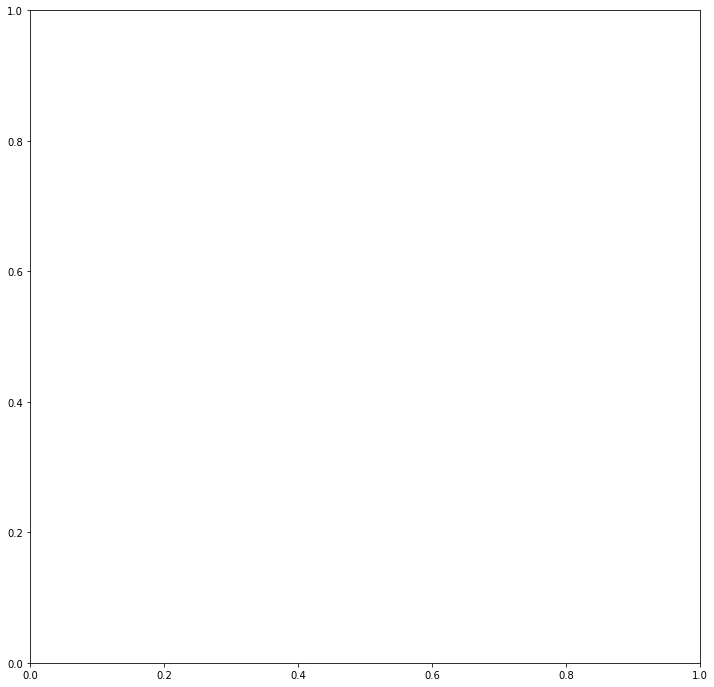

In [83]:
#print(ufl1[10].shape)
#plt.plot(t_[indStart:indEnd],dd[10][indStart:indEnd,122,2],'r-')
#print(probePosition1[0:-1:3].shape)
plt.figure(1,figsize=(12,12))
for i in range(4):
    plt.plot(probePosition[0:-1:3,0],u[i:-1:2][0:-1:3],'-')
#    plt.plot(probePosition1[0:-1:3,0],u1[i][0:-1:3],'x')
#    plt.plot(probePosition2[0:-1:3,0],u2[i][0:-1:3],'o')
#    plt.plot(probePosition3[0:-1:3,0],u3[i][0:-1:3],'--')
#    plt.plot(probePosition4[0:-1:3,0],u4[i][0:-1:3],'+')
#    plt.plot(probePosition5[0:-1:3,0],u5[i][0:-1:3],'.')
plt.xlabel('z (m)')
#plt.legend(['westdump0.5','westdump0.25','nowestdump','nodump','noeastdupm','onlyup'])
    #plt.plot([t_[indStart],t_[indEnd]],[u[i][122],u[i][122]],'k--')
#plt.plot([t_[indStart],t_[indEnd]],[u[10][0],u[10][0]],'r--')
#plt.plot([t_[indStart],t_[indEnd]],[amflu[10][100],amflw[10][100]],'b-')
#plt.plot(t1_[indStart1:indEnd1],dd1[0][indStart1:indEnd1,0,0],'g-')
#plt.plot(t1_[indStart1:indEnd1],dd1[1][indStart1:indEnd1,0,0],'y-')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[u1[0][0],u1[1][0]],'c--')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[amflw1[0][0],amflw1[0][0]],'m-')


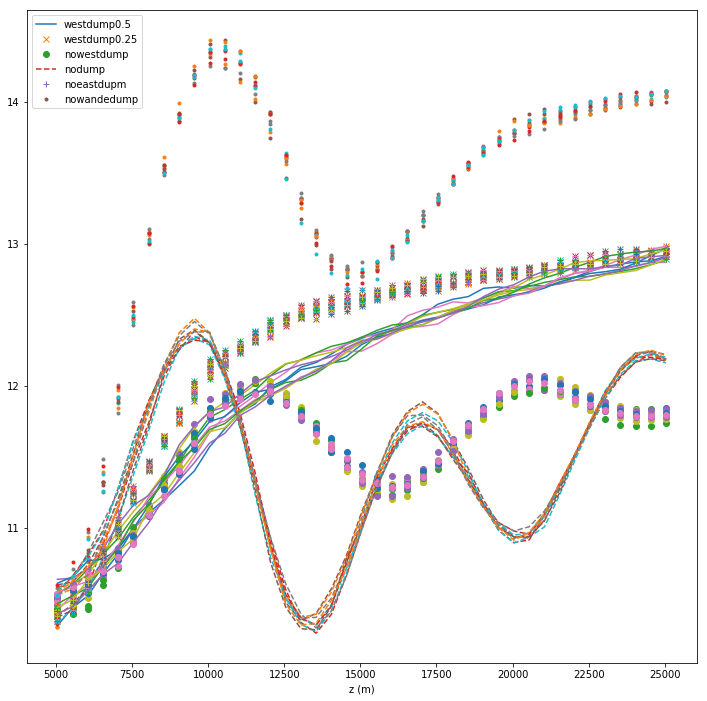

In [371]:
#print(ufl1[10].shape)
#plt.plot(t_[indStart:indEnd],dd[10][indStart:indEnd,122,2],'r-')
#print(probePosition1[0:-1:3].shape)
plt.figure(1,figsize=(12,12))
for i in range(10):
    plt.plot(probePosition[1:-1:3,0],u[i][1:-1:3],'-')
    plt.plot(probePosition1[1:-1:3,0],u1[i][1:-1:3],'x')
    plt.plot(probePosition2[1:-1:3,0],u2[i][1:-1:3],'o')
    plt.plot(probePosition3[1:-1:3,0],u3[i][1:-1:3],'--')
    plt.plot(probePosition4[1:-1:3,0],u4[i][1:-1:3],'+')
    plt.plot(probePosition5[1:-1:3,0],u5[i][1:-1:3],'.')
plt.xlabel('z (m)')
plt.legend(['westdump0.5','westdump0.25','nowestdump','nodump','noeastdupm','nowandedump'])
    #plt.plot([t_[indStart],t_[indEnd]],[u[i][122],u[i][122]],'k--')
#plt.plot([t_[indStart],t_[indEnd]],[u[10][0],u[10][0]],'r--')
#plt.plot([t_[indStart],t_[indEnd]],[amflu[10][100],amflw[10][100]],'b-')
#plt.plot(t1_[indStart1:indEnd1],dd1[0][indStart1:indEnd1,0,0],'g-')
#plt.plot(t1_[indStart1:indEnd1],dd1[1][indStart1:indEnd1,0,0],'y-')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[u1[0][0],u1[1][0]],'c--')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[amflw1[0][0],amflw1[0][0]],'m-')


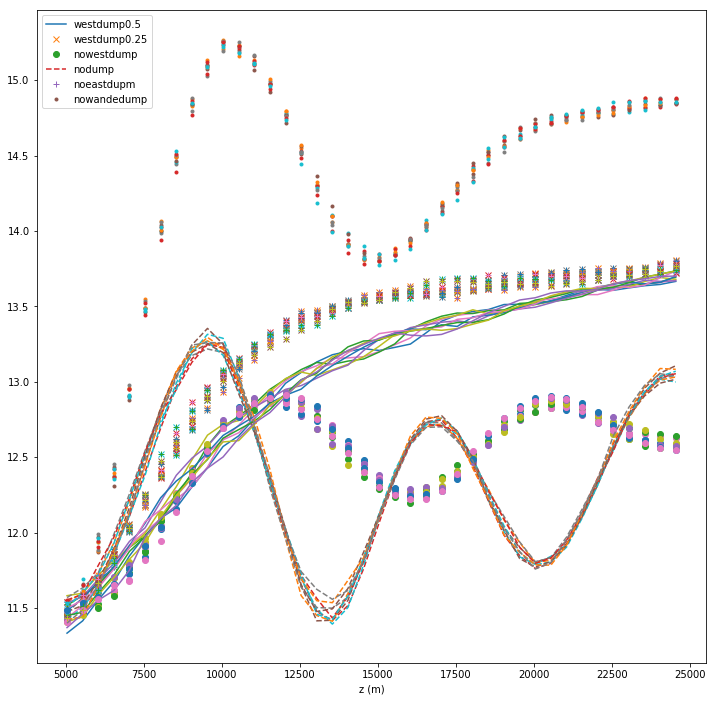

In [370]:
#print(ufl1[10].shape)
#plt.plot(t_[indStart:indEnd],dd[10][indStart:indEnd,122,2],'r-')
#print(probePosition1[0:-1:3].shape)
plt.figure(1,figsize=(12,12))
for i in range(10):
    plt.plot(probePosition[2:-1:3,0],u[i][2:-1:3],'-')
    plt.plot(probePosition1[2:-1:3,0],u1[i][2:-1:3],'x')
    plt.plot(probePosition2[2:-1:3,0],u2[i][2:-1:3],'o')
    plt.plot(probePosition3[2:-1:3,0],u3[i][2:-1:3],'--')
    plt.plot(probePosition4[2:-1:3,0],u4[i][2:-1:3],'+')
    plt.plot(probePosition5[2:-1:3,0],u5[i][2:-1:3],'.')
plt.xlabel('z (m)')
plt.legend(['westdump0.5','westdump0.25','nowestdump','nodump','noeastdupm','nowandedump'])
    #plt.plot([t_[indStart],t_[indEnd]],[u[i][122],u[i][122]],'k--')
#plt.plot([t_[indStart],t_[indEnd]],[u[10][0],u[10][0]],'r--')
#plt.plot([t_[indStart],t_[indEnd]],[amflu[10][100],amflw[10][100]],'b-')
#plt.plot(t1_[indStart1:indEnd1],dd1[0][indStart1:indEnd1,0,0],'g-')
#plt.plot(t1_[indStart1:indEnd1],dd1[1][indStart1:indEnd1,0,0],'y-')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[u1[0][0],u1[1][0]],'c--')
#plt.plot([t1_[indStart1],t1_[indEnd1]],[amflw1[0][0],amflw1[0][0]],'m-')


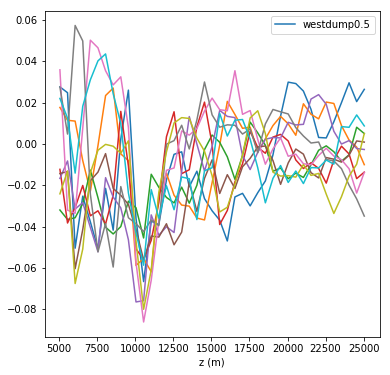

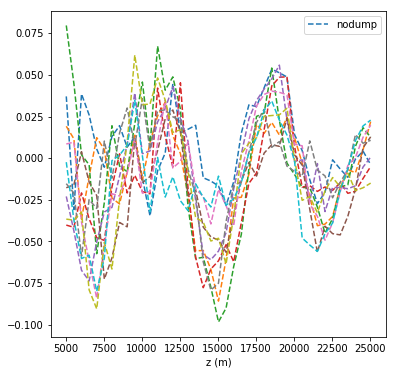

In [374]:
#print(ufl1[10].shape)
#plt.plot(t_[indStart:indEnd],dd[10][indStart:indEnd,122,2],'r-')
#print(probePosition1[0:-1:3].shape)
plt.figure(1,figsize=(6,6))
for i in range(10):
    plt.plot(probePosition[0:-1:3,0],w[i][0:-1:3],'-')
#    plt.plot(probePosition1[0:-1:3,0],w1[i][0:-1:3],'x')
#    plt.plot(probePosition2[0:-1:3,0],w2[i][0:-1:3],'o')
#    plt.plot(probePosition3[0:-1:3,0],w3[i][0:-1:3],'--')
#    plt.plot(probePosition4[0:-1:3,0],w4[i][0:-1:3],'+')
#    plt.plot(probePosition5[0:-1:3,0],w5[i][0:-1:3],'.')
plt.xlabel('z (m)')
plt.legend(['westdump0.5'])
plt.figure(2,figsize=(6,6))
for i in range(10):
    plt.plot(probePosition3[0:-1:3,0],w3[i][0:-1:3],'--')
plt.xlabel('z (m)')
plt.legend(['nodump'])



[[1.368368   1.83975325 0.30860996]
 [1.21260764 1.79536262 0.32535685]
 [1.0571751  1.72689895 0.41466396]
 ...
 [0.3630525  0.57486389 0.20495178]
 [0.46475493 0.85382334 0.15780247]
 [0.71077614 1.08439579 0.23870479]]


ValueError: x and y must have same first dimension, but have shapes (0, 3) and (123,)

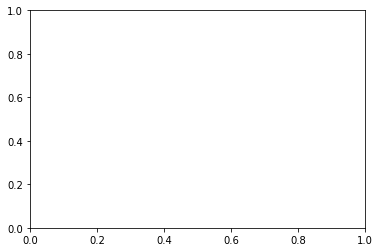

In [313]:
print(uhfl[0])
#plt.plot(t_[indStart:indEnd],dd[10][indStart:indEnd,122,2],'r-')
for i in range(10):
    plt.plot(uhfl[i][indStart:indEnd,:],z[0],'-')
#    plt.plot(probePosition1[0:-1:3,0],uhfl1[i][0:-1:3],'x')
#    plt.plot(probePosition2[0:-1:3,0],uhfl2[i][0:-1:3],'o')
#    plt.plot(probePosition3[0:-1:3,0],uhfl3[i][0:-1:3],'--')
#    plt.plot(probePosition4[0:-1:3,0],uhfl4[i][0:-1:3],'+')
#    plt.plot(probePosition5[0:-1:3,0],uhfl5[i][0:-1:3],'.')



NameError: name 'uh2' is not defined

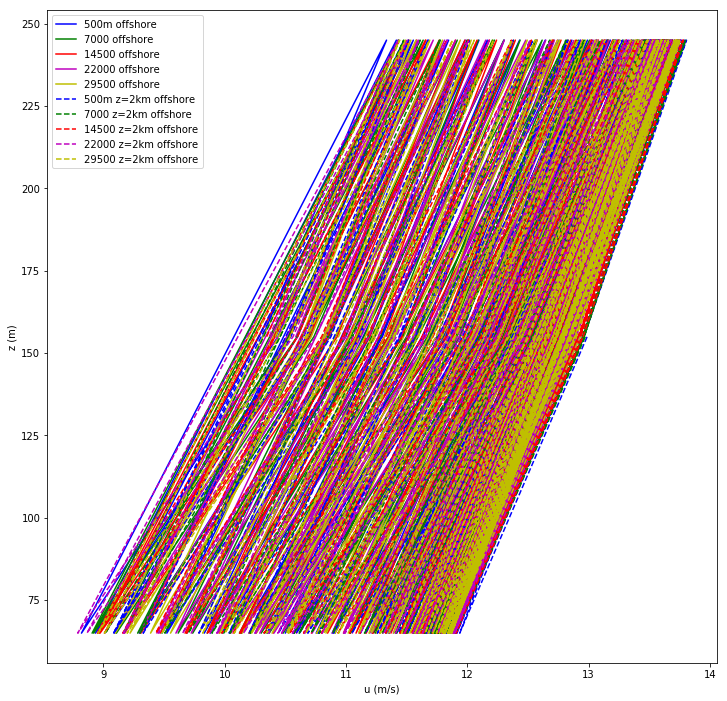

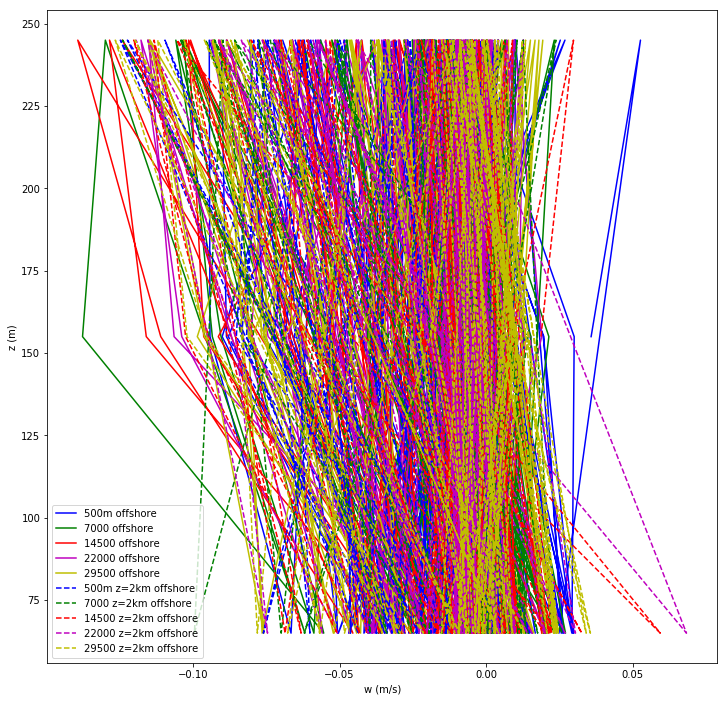

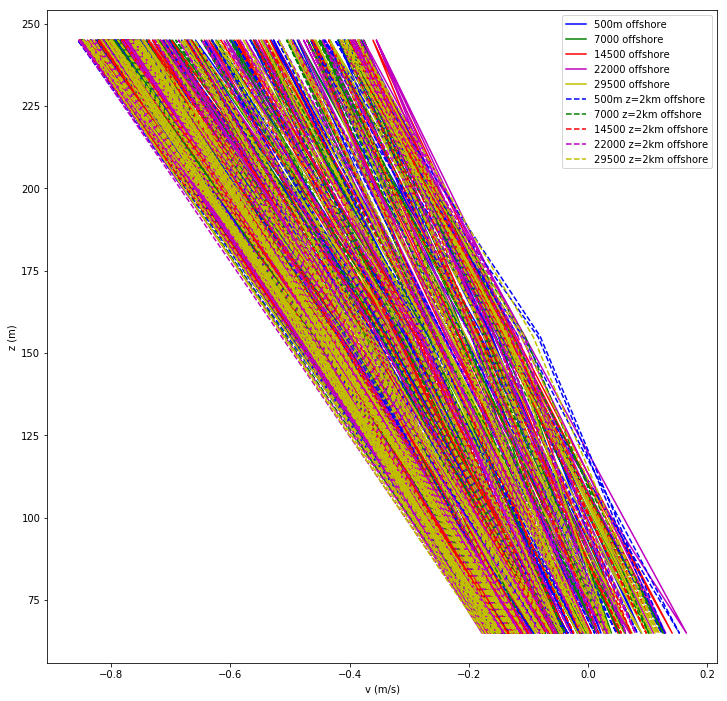

<Figure size 864x864 with 0 Axes>

In [160]:
k=1
plt.figure(1,figsize=(12,12))
plt.plot(u[0][1:-1:k],z[0][1:-1:k],'b-',
         u[1][1:-1:k],z[1][1:-1:k],'g-',
         u[2][1:-1:k],z[2][1:-1:k],'r-',
         u[3][1:-1:k],z[3][1:-1:k],'m-',
         u[4][1:-1:k],z[4][1:-1:k],'y-',
         u1[0][1:-1:k],z1[0][1:-1:k],'b--',
         u1[1][1:-1:k],z1[1][1:-1:k],'g--',
         u1[2][1:-1:k],z1[2][1:-1:k],'r--',
         u1[3][1:-1:k],z1[3][1:-1:k],'m--',
         u1[4][1:-1:k],z1[4][1:-1:k],'y--')
plt.xlabel('u (m/s)')
plt.ylabel('z (m)')
plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore', '500m z=2km offshore','7000 z=2km offshore','14500 z=2km offshore','22000 z=2km offshore','29500 z=2km offshore'])

plt.figure(2,figsize=(12,12))
plt.plot(w[0][1:-1:k],z[0][1:-1:k],'b-',
         w[1][1:-1:k],z[1][1:-1:k],'g-',
         w[2][1:-1:k],z[2][1:-1:k],'r-',
         w[3][1:-1:k],z[3][1:-1:k],'m-',
         w[4][1:-1:k],z[4][1:-1:k],'y-',
         w1[0][1:-1:k],z1[0][1:-1:k],'b--',
         w1[1][1:-1:k],z1[1][1:-1:k],'g--',
         w1[2][1:-1:k],z1[2][1:-1:k],'r--',
         w1[3][1:-1:k],z1[3][1:-1:k],'m--',
         w1[4][1:-1:k],z1[4][1:-1:k],'y--')
plt.xlabel('w (m/s)')
plt.ylabel('z (m)')
plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore', '500m z=2km offshore','7000 z=2km offshore','14500 z=2km offshore','22000 z=2km offshore','29500 z=2km offshore'])


plt.figure(3,figsize=(12,12))
plt.plot(v[0][1:-1:k],z[0][1:-1:k],'b-',
         v[1][1:-1:k],z[1][1:-1:k],'g-',
         v[2][1:-1:k],z[2][1:-1:k],'r-',
         v[3][1:-1:k],z[3][1:-1:k],'m-',
         v[4][1:-1:k],z[4][1:-1:k],'y-',
         v1[0][1:-1:k],z1[0][1:-1:k],'b--',
         v1[1][1:-1:k],z1[1][1:-1:k],'g--',
         v1[2][1:-1:k],z1[2][1:-1:k],'r--',
         v1[3][1:-1:k],z1[3][1:-1:k],'m--',
         v1[4][1:-1:k],z1[4][1:-1:k],'y--')
plt.xlabel('v (m/s)')
plt.ylabel('z (m)')
plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore', '500m z=2km offshore','7000 z=2km offshore','14500 z=2km offshore','22000 z=2km offshore','29500 z=2km offshore'])

plt.figure(4,figsize=(12,12))
plt.plot(uh[0][1:-1:k],z[0][1:-1:k],'b-',
         uh[1][1:-1:k],z[1][1:-1:k],'g-',
         uh[2][1:-1:k],z[2][1:-1:k],'r-',
         uh[3][1:-1:k],z[3][1:-1:k],'m-',
         uh[4][1:-1:k],z[4][1:-1:k],'y-',
         uh1[0][1:-1:k],z1[0][1:-1:k],'b--',
         uh1[1][1:-1:k],z1[1][1:-1:k],'g--',
         uh1[2][1:-1:k],z1[2][1:-1:k],'r--',
         uh1[3][1:-1:k],z1[3][1:-1:k],'m--',
         uh1[4][1:-1:k],z1[4][1:-1:k],'y--',
         uh2[0][1:-1:k],z2[0][1:-1:k],'bx',
         uh2[1][1:-1:k],z2[1][1:-1:k],'gx',
         uh2[2][1:-1:k],z2[2][1:-1:k],'rx',
         uh2[3][1:-1:k],z2[3][1:-1:k],'mx',
         uh2[4][1:-1:k],z2[4][1:-1:k],'yx')
plt.xlabel('V (m/s)')
plt.ylabel('z (m)')
plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore', '500m z=2km offshore','7000 z=2km offshore','14500 z=2km offshore','22000 z=2km offshore','29500 z=2km offshore'])

plt.figure(5,figsize=(12,12))
plt.plot(uh[0][1:-1:k],z[0][1:-1:k],'b-',
         
         uh1[0][1:-1:k],z1[0][1:-1:k],'b--',
         
         uh2[0][1:-1:k],z2[0][1:-1:k],'bx')
plt.xlabel('V (m/s)')
plt.ylabel('z (m)')
plt.legend(['z=1km 500m offshore','z=2km 500m offshore','z=5km 500m offshore'])
plt.savefig('probes_500moffshore.png')

plt.figure(6,figsize=(12,12))
plt.plot(
         uh[2][1:-1:k],z[2][1:-1:k],'r-',
         
         uh1[2][1:-1:k],z1[2][1:-1:k],'r--',
         
         uh2[2][1:-1:k],z2[2][1:-1:k],'rx')
plt.xlabel('V (m/s)')
plt.ylabel('z (m)')
plt.legend(['z=1km 14500m offshore','z=2km 14500m offshore','z=5km 14500m offshore'])
plt.savefig('probes_14500moffshore.png')

plt.figure(7,figsize=(12,12))
plt.plot(
         uh[4][1:-1:k],z[4][1:-1:k],'y-',
         
         uh1[4][1:-1:k],z1[4][1:-1:k],'y--',
         
         uh2[4][1:-1:k],z2[4][1:-1:k],'yx')
plt.xlabel('V (m/s)')
plt.ylabel('z (m)')
plt.legend(['z= 1km 29500m offshore', 'z=2km 29500m offshore','z=5km 29500m offshore'])
plt.savefig('probes_29500moffshore.png')

k=1
l=1

plt.figure(8,figsize=(12,12))
plt.plot(T[0][1:-1:l],z2[0][1:-1:k],'b+',
         T[1][1:-1:l],z2[1][1:-1:k],'gx',
         T[2][1:-1:l],z2[2][1:-1:k],'ro',
         T[3][1:-1:l],z2[3][1:-1:k],'m+',
         T[4][1:-1:l],z2[4][1:-1:k],'y+')
plt.ylim([0.0,5000.0])
plt.xlabel('u1 (m/s)')
plt.ylabel('z1 (m)')
plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore'])

#plt.figure(5,figsize=(12,12))
#plt.plot(u[0][::2],z[0][::k],'b-')
#plt.xlabel('u (m/s)')
#plt.ylabel('z (m)')
#plt.legend(['upstream','downstream','downstream2'])

In [7]:
### Import the necessary modules/classes.

modulePath = '/N/project/windenergy/python/ABLTools/python'

import sys
sys.path.append(modulePath)

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import readData
import matplotlib.colors as mcolors
import matplotlib.cm as cm


dataDirectory = '/N/project/windenergy/jovanka/sea_20_tdiff/postProcessing'
probes = ['probe2', 'probe41',
          'probe86',
          'probe131',
          'probe176']

timeStatisticsStart = 22000.0
timeStatisticsEnd = 32000.0
avgInterval = 1000.0
nAvr=(timeStatisticsEnd-timeStatisticsStart)/1000

In [ ]:
u = []
v = []
w = []
uh = []
z = []
t = []
nProbes = len(probes)

for m in range(nProbes):
    probeFile = dataDirectory + '/' + probes[m]
    
    t_,data_,probePosition,nComponents,nProbes = readData.probeOpenFOAM(probeFile,'U')

    indStart = np.abs(t_ - timeStatisticsStart).argmin()
    indEnd = np.abs(t_ - timeStatisticsEnd).argmin()
        
    t.append(t_)
    
    uvw_ = np.mean(data_[indStart:indEnd,:],axis=0)
    
    u.append(uvw_[:,0])
    v.append(uvw_[:,1])
    w.append(uvw_[:,2])
    uh.append(np.sqrt(np.square(u[m]) + np.square(v[m])))
    z.append(probePosition[:,2])

In [9]:
uMean = []
vMean = []
wMean = []
uhMean = []

for m in range(nProbes):
    nAvgPeriods = int(t[m][-1] / 1000)
    avgPeriods = np.zeros((nAvgPeriods,2))
    
    u_ = np.zeros((nAvgPeriods,len(z[m])))
    v_ = np.zeros((nAvgPeriods,len(z[m])))
    w_ = np.zeros((nAvgPeriods,len(z[m])))
    uh_ = np.zeros((nAvgPeriods,len(z[m])))
    
    for i in range(nAvgPeriods):
        avgPeriods[i,0] = i*avgInterval
        avgPeriods[i,1] = (i+1)*avgInterval
        
        indexAvgStart = np.argmax(np.abs(t[m] >= avgPeriods[i,0]))
        indexAvgEnd = np.argmax(np.abs(t[m] >= avgPeriods[i,1]))
        if (indexAvgEnd == 0):
            indexAvgEnd = len(t[m]) - 1
    
        print('Time avgeraging case from time ' + str(t[m][indexAvgStart]) + ' to ' + str(t[m][indexAvgEnd]) + '...')
    
    
        # Perform the averaging.
        u_ = np.mean(u[indexAvgStart:indexAvgEnd,:],axis=0)
        v_ = np.mean(v[indexAvgStart:indexAvgEnd,:],axis=0)
        w_ = np.mean(w[indexAvgStart:indexAvgEnd,:],axis=0)
        
        uh_ = np.sqrt(np.square(u_) + np.square(v_))
        
        uMean.append(u_)
        vMean.append(v_)
        wMean.append(w_)
        uhMean.append(uh_)

Time avgeraging case from time 20000.5660377 to 33919.3433241...


TypeError: list indices must be integers or slices, not tuple

In [ ]:
plt.figure(2,figsize=(12,12))
plt.plot(T[0][1,:],z[0],'b-',
         T[1][1,:],z[1],'g-',
         T[2][1,:],z[2],'r-',
         T[3][1,:],z[3],'m-',
         T[4][1,:],z[4],'y-')
plt.xlabel('T (C)')
plt.ylabel('z (m)')
#plt.legend(['500m offshore','7000 offshore','14500 offshore','22000 offshore','29500 offshore'])


#normalize = mcolors.Normalize(vmin=10.0, vmax=22.0)
#colormap = cm.jet 

#ccolor = lambda x: colormap(normalize(x))

#plt.figure(1,figsize=(12,12))
#for i in range(nAv):
#    plt.plot(u[0][:],z[0][:],color=ccolor(i))
#plt.xlabel('u (m/s)')
#plt.ylabel('z (m)')
        